# Analiza nepremičnin in prihodkov prebivalstva

Sodelujoči:

- Rok Švikart

# Povezave do podatkov:

Podatki o nepremičninah: https://podatki.gov.si/dataset/surs0419030s, 
                                          https://podatki.gov.si/dataset/evidenca-trga-nepremicnin
                                          
Podatki o prihodkih: https://www.gov.si/teme/minimalna-placa/, 
                       https://pxweb.stat.si/SiStatData/pxweb/sl/Data/-/0701011S.px


# Uvod

Nepremičninski trg je zelo pomemben za vsakega posameznika, saj vsi potrebujemo prebivališče ali delovne prostore, če želimo ustanoviti svoje podjetje ali manjši posel. Zaradi gotovosti, da se bomo v prihodnosti vsi srečevali s tem trgom, smo se v skupini odločili narediti projekt o nepremičninskem trgu in o njegovi možni prihodnosti. 

Poročilo: https://github.com/DocChinchillin/PR22RSMCLK/blob/main/README.md <br>
Koda: https://github.com/DocChinchillin/PR22RSMCLK/blob/main/projektna.ipynb

# Opis problema

Pri nalogi si želimo predstaviti obnašanje nepremičnin na trgu, ter prihodkov prebivalstva. Želimo analizirati trende o cenah, ali rastejo, padajao ali pa stagnirajo. S to analizo podatkov, bi lahko odgovorili na vprašljivo prihodnost nepremičninskega trga in vprašanja ali bo oseba glede na povprečne prihodke v Sloveniji na tem trgu lahko sodelovala, ali je to v današnjih časih vedno težje.

# Podatki

Pri vmesenm poročili smo uporabili tri različne podatkovne datoteke, in sicer:

    - min_place.csv - manjša datoteka z minimalnimi plačami v Sloveniji skozi leta 2010 - 2021
    
    - povp_place.csv - datoteka, ki vsebuje povprečno bruto plačo za mesec in tromesečje in povprečno neto plačo za posamezen mesec in tromesečje v obdobjih 2014 - 2021

    - st_in_vrednost_nepremicnin.csv - datoteka, ki vsebuje podatke o številu transakcij in njihovih skupnih prihodkih glede na četrtletja v obdobju 2010 - 2021 za posamezne tipe nepremičnine, ki pa so:
        - Nova stanovanja
        - Nove družinske hiše
        - Rabljena stanovanja
        - Rabljene družinske hiše
    
Preostanejo še podatki o evidenci trga nerpemičnin med leti 2007 ter 2022, razdeljeni na tri datoteke, in sicer delistavb.csv, posli.csv ter zemljisca.csv (format: ETN_SLO_KUP_"leto"_"ime"_20220326.csv). Od teh datotek smo uporabljali podatke v posli.csv in delistavb.csv, nismo pa uporabljali zemljisca.csv. Datoteke vsebujejo veliko podrbobnejših informacij o posameznih transakcijah (površina, regija, občina, opombe...).

# Knjižnice


In [1]:
import csv
from csv import DictReader
import re
import matplotlib
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
startYear = 2020
endYear = 2024

# Branje podatkov

Priprava regij za prevrjanje v nadaljnem delu. Nameravamo pregledovati nepremičninski trg v posameznih regijah, zato smo pripravili set-e o občinah, ki so v regijah, za lažje določanje pripadanja podatkov ustreznim regijam.

In [3]:
#Podatki: katera občina pripada kateri regiji
regije = {
    "obalnokraska" : set(("ANKARAN", "DIVAČA", "HRPELJE-KOZINA", "IZOLA", "KOMEN", "KOPER", "PIRAN","SEŽANA")),
    "primorskonotranjska" : set(("BLOKE", "CERKNICA", "ILIRSKA BISTRICA", "LOŠKA DOLINA", "PIVKA", "POSTOJNA")),
    "goriska" : set(("AJDOVŠČINA", "BOVEC", "BRDA", "CERKNO", "IDRIJA", "KANAL", "KOBARID", "MIREN-KOSTANJEVICA", "NOVA GORICA", "RENČE-VOGRSKO", "ŠEMPETER-VRTOJBA", "TOLMIN", "VIPAVA")),
    "gorenjska" : set(("BLED", "BOHINJ", "CERKLJE NA GORENJSKEM", "GORENJA VAS-POLJANE", "GORJE", "JESENICE", "JEZERSKO", "KRANJ", "KRANJSKA GORA", "NAKLO", "PREDDVOR", "RADOVLJICA", "ŠENČUR", "ŠKOFJA LOKA", "TRŽIČ", "ŽELEZNIKI", "ŽIRI", "ŽIROVNICA")),
    "osrednjeslovenska" : set(("BOROVNICA", "BRZOVICA", "DOBREPOLJE", "DOBROVA-POLHOV GRADEC", "DOL PRI LJUBLJANI", "DOMŽALE", "GROSUPLJE", "HORJUL", "IG", "IVANČNA GORICA", "KAMNIK", "KOMENDA", "LJUBLJANA", "LOG-DRAGOMER", "LOGATEC", "LUKOVICA", "MEDVODE", "MENGEŠ", "MORAVČE", "ŠKOFLJICA", "ŠMARTNO PRI LITIJI", "TRZIN", "VELIKE LAŠČE", "VODICE", "VRHNIKA","BREZOVICA")),
    "zasavska" : set(("HRASTNIK", "LITIJA", "TRBOVLJE", "ZAGORJE OB SAVI")),
    "jugovzhodnaslovenija" : set(("ČRNOMELJ", "DOLENJSKE TOPLICE", "KOČEVJE", "KOSTEL", "LOŠKI POTOK", "METLIKA", "MIRNA", "MIRNA PEČ", "MOKRONOG-TREBELNO", "NOVO MESTO", "OSILNICA", "RIBNICA", "SEMIČ", "SODRAŽICA", "STRAŽA", "ŠENTJERNEJ", "ŠENTRUPERT", "ŠKOCJAN", "ŠMARJEŠKE TOPLICE", "TREBNJE", "ŽUŽEMBERK")),
    "posavska" : set(("BISTRICA OB SOTLI", "BREŽICE", "KOSTANJEVICA NA KRKI", "KRŠKO", "RADEČE", "SEVNICA")),
    "savinjska" : set(("BRASLOVČE", "CELJE", "DOBJE", "DOBRNA", "GORNJI GRAD", "KOZJE", "LAŠKO", "LJUBNO", "LUČE", "MOZIRJE", "NAZARJE", "PODČETRTEK", "POLZELA", "PREBOLD", "REČICA OB SAVINJI", "ROGAŠKA SLATINA", "ROGATEC", "SLOVENSKE KONJICE", "SOLČAVA", "ŠENTJUR", "ŠMARJE PRI JELŠAH", "ŠMARTNO OB PAKI", "ŠOŠTANJ", "ŠTORE", "TABOR", "VELENJE", "VITANJE", "VOJNIK", "VRANSKO", "ZREČE", "ŽALEC")),
    "koroska" : set(("ČRNA NA KOROŠKEM", "DRAVOGRAD", "MEŽICA", "MISLINJA", "MUTA", "PODVELKA", "PREVALJE", "RADLJE OB DRAVI", "RAVNE NA KOROŠKEM", "RIBNICA NA POHORJU", "SLOVENJ GRADEC", "VUZENICA")),
    "podravska" : set(("BENEDIKT", "CERKVENJAK", "CIRKULANE", "DESTRNIK", "DORNAVA", "DUPLEK", "GORIŠNICA", "HAJDINA", "HOČE-SLIVNICA", "JURŠINCI", "KIDRIČEVO", "KUNGOTA", "LENART", "LOVRENC NA POHORJU", "MAJŠPERK", "MAKOLE", "MARIBOR", "MARKOVCI", "MIKLAVŽ NA DRAVSKEM POLJU", "OPLOTNICA", "ORMOŽ", "PESNICA", "PODLEHNIK", "POLJČANE", "PTUJ", "RAČE-FRAM", "RUŠE", "SELNICA OB DRAVI", "SLOVENSKA BISTRICA", "SREDIŠČE OB DRAVI", "STARŠE", "SVETA ANA", "SV. TROJICA V SLOV. GORICAH", "SVETI ANDRAŽ V SLOV. GORICAH", "SVETI JURIJ V SLOV. GORICAH", "SVETI TOMAŽ", "ŠENTILJ", "TRNOVSKA VAS", "VIDEM", "ZAVRČ", "ŽETALE")),
    "pomurska" : set(("APAČE", "BELTINCI", "CANKOVA", "ČRENŠOVCI", "DOBROVNIK", "GORNJA RADGONA", "GORNJI PETROVCI", "GRAD", "HODOŠ", "KOBILJE", "KRIŽEVCI", "KUZMA", "LENDAVA", "LJUTOMER", "MORAVSKE TOPLICE", "MURSKA SOBOTA", "ODRANCI", "PUCONCI", "RADENCI", "RAZKRIŽJE", "ROGAŠOVCI", "SVETI JURIJ OB ŠČAVNICI", "ŠALOVCI", "TIŠINA", "TURNIŠČE", "VELIKA POLANA", "VERŽEJ"))
}
#stil pri izrisu regij
style = {'gorenjska':('red','solid'), 'obalnokraska':('blue','solid'), 'goriska':('green','solid'), 'savinjska':('gold','dashed'), 'primorskonotranjska':('orange','dashed'), 'osrednjeslovenska':('purple','solid'), 'jugovzhodnaslovenija':('darkviolet','solid'), 'zasavska':('saddlebrown','solid'), 'posavska':('grey','solid'), 'koroska':('teal','solid'), 'podravska':('seagreen','dashed'), 'pomurska':('yellowgreen','solid')}

In [41]:
deliTypes = {
'ID_POSLA': 'i8',
'SIFRA_KO': 'i8',
'IME_KO': 'U500',
'OBCINA': 'U500',
'STEVILKA_STAVBE': 'i8',
'STEVILKA_DELA_STAVBE': 'i8',
'PARCELNA_STEVILKA_ZA_GEOLOKACIJO': 'U100',
'INTERNA_OZNAKA_DELA_STAVBE': 'U300',
'EVIDENTIRANOST_DELA_STAVBE': 'i8',
'NASELJE': 'U500',
'ULICA': 'U500',
'HISNA_STEVILKA': 'i4',
'DODATEK_HS': 'U100',
'STEVILKA_STANOVANJA_ALI_POSLOVNEGA_PROSTORA': 'i8',
'VRSTA_DELA_STAVBE': 'i8',
'LETO_IZGRADNJE_DELA_STAVBE': 'i4',
'STAVBA_JE_DOKONCANA': 'b',
'GRADBENA_FAZA': 'i4',
'NOVOGRADNJA': 'b',
'PRODANA_POVRSINA': 'f8',
'PRODANI_DELEZ_DELA_STAVBE': 'U300',
'PRODANA_POVRSINA_DELA_STAVBE': 'f8',
'PRODANA_UPORABNA_POVRSINA_DELA_STAVBE': 'U1',
'NADSTROPJE_DELA_STAVBE': 'U1',
'STEVILO_ZUNANJIH_PARKIRNIH_MEST': 'U1',
'ATRIJ': 'U1',
'POVRSINA_ATRIJA': 'U1',
'OPOMBE_O_NEPREMICNINI': 'U1',
'DEJANSKA_RABA_DELA_STAVBE': 'U500',
'LEGA_DELA_STAVBE_V_STAVBI': 'U500',
'STEVILO_SOB': 'U2',
'POVRSINA_DELA_STAVBE': 'f8',
'UPORABNA_POVRSINA': 'f8',
'PROSTORI_DELA_STAVBE': 'U500',
'POGODBENA_CENA_DELA_STAVBE': 'f8',
'STOPNJA_DDV_DELA_STAVBE': 'i4',
'E_CENTROID': 'U8',
'N_CENTROID': 'U8',
'LETO': 'i4'}

Branje podatkov Evidence trga nepremičnin. Podatki so zelo obsežni in so v večih datotekah. Razdeljeni so po letih od 2007 do 2022 in nato še za svako leto na datoteko šifrantov, datoteko poslov, datoteko zemljišč, datoteko delov stavb in datoteko strank, ki pa nam ni dostopna zaradi varovanja osebnih podatkov.

In [4]:
def EtnRead(year, tip:str, header = None): #header je če nas zanima le header vrstica, določene ETN datoteke
    tip = tip.upper()
    if tip not in ('POSLI','DELISTAVB','ZEMLJISCA'): #table get check
        print(f'Unknown file name "{tip}";\nAllowed : "POSLI" , "DELISTAVB", "ZEMLJISCA"')
        return None

    if not (startYear <= year < endYear + 1):  #year range check
        print(f'Incorrect year: {year}\n')
        return None
                            #index stolpca opombe, ki ga zbrišemo saj nam opomba lahko bloata np table
                            #index opombe v csvju : posli = zemljisca = 9 , delistavb = 27
                            ####če je treba preskočiti še kakšen stolpec, dodaj v pravi list index stolpca###
    indexi = []     
    if tip == 'DELISTAVB': # 27:OPOMBE_O_NEPREMICNINI, 33:PROSTORI_DELA_STAVBE
        indexi = [27,33]
        
    if tip == 'ZEMLJISCA': # 9:OPOMBE_O_NEPREMICNINI
        indexi = [9]
    
    if tip == 'POSLI':
        indexi = [9]   # 9:OPOMBE_O_PRAVNEM_POSLU
    # TODO fix tale hardkode datum 20240721
    # ETN_SLO_2020_KPP_KPP_DELISTAVB_20240721
    data_path = f'podatki/ETN_SLO_{year}_KPP_20240721/ETN_SLO_{year}_KPP_KPP_{tip}_20240721.csv'
    # maxLength = 0
    # maxI = 0

    with open(data_path,encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        data = []

        head = next(reader,None) #skip header

        if header:
            return head #vrne header row

        for row in reader:
            try:
                for i in indexi:
                    # try:
                    #     if type(opombe) is dict:
                    #         if row[i] != '':
                    #             if row[i] not in opombe.keys():
                    #                 opombe[row[i]] = 1
                    #             else:
                    #                 opombe[row[i]] += 1
                    # except:
                    #     pass
                    row[i] = ""
            except Exception as e:
                print(i,indexi)
                print(row)
                _ = [print(x) for x in enumerate(row[0].split(','))]
                print(f"Exception: {e}")
                return
            # for i,r in enumerate(row):
            #     if len(r) > maxLength:
            #         maxLength = len(r)
            #         maxI = i
            data.append(row)
            print(row)
    
    return np.array(data)



In [56]:

def handle_empty_strings(row, column_types):
    """Replace empty strings with a default value based on column type."""
    for i, (value, col_type) in enumerate(zip(row, column_types)):
        if value == '' or value == ' ':
            if 'i' in col_type:  # Integer type
                row[i] = 0
            elif 'f' in col_type:  # Float type
                row[i] = 0.0
            elif 'b' in col_type:  # Boolean type
                row[i] = False
            else:  # Default for strings or unknowns
                row[i] = ''
    return row

def EtnRead(year, tip:str, header = None): #header je če nas zanima le header vrstica, določene ETN datoteke
    tip = tip.upper()
    if tip not in ('POSLI','DELISTAVB','ZEMLJISCA'): #table get check
        print(f'Unknown file name "{tip}";\nAllowed : "POSLI" , "DELISTAVB", "ZEMLJISCA"')
        return None

    if not (startYear <= year < endYear + 1):  #year range check
        print(f'Incorrect year: {year}\n')
        return None
                            #index stolpca opombe, ki ga zbrišemo saj nam opomba lahko bloata np table
                            #index opombe v csvju : posli = zemljisca = 9 , delistavb = 27
                            ####če je treba preskočiti še kakšen stolpec, dodaj v pravi list index stolpca###
    indexi = []     
    if tip == 'DELISTAVB': # 27:OPOMBE_O_NEPREMICNINI, 33:PROSTORI_DELA_STAVBE
        indexi = [27,33]
        
    if tip == 'ZEMLJISCA': # 9:OPOMBE_O_NEPREMICNINI
        indexi = [9]
    
    if tip == 'POSLI':
        indexi = [9]   # 9:OPOMBE_O_PRAVNEM_POSLU
    # TODO fix tale hardkode datum 20240721
    # ETN_SLO_2020_KPP_KPP_DELISTAVB_20240721
    data_path = f'podatki/ETN_SLO_{year}_KPP_20240721/ETN_SLO_{year}_KPP_KPP_{tip}_20240721.csv'


    with open(data_path,encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        data = []

        head = next(reader,None) #skip header

        if header:
            return head #vrne header row

        for row in reader:

            data.append(row)

        if tip == 'DELISTAVB':
            typesDict = deliTypes
        # Apply the empty string handler to each row
        data = [handle_empty_strings(row, typesDict.values()) for row in data]

        dtype = [(head, typesDict[head]) for i, head in enumerate(head)]
    
    return np.array([tuple(row) for row in data], dtype=dtype)

In [13]:
zemHeader ={col:i for i,col in enumerate(EtnRead(2020,'ZEMLJISCA',True))}
print(zemHeader)


{'ID_POSLA': 0, 'SIFRA_KO': 1, 'IME_KO': 2, 'OBCINA': 3, 'PARCELNA_STEVILKA': 4, 'VRSTA_ZEMLJISCA': 5, 'VRSTA_TRAJNEGA_NASADA': 6, 'STAROST_TRAJNEGA_NASADA': 7, 'PRODANI_DELEZ_PARCELE': 8, 'OPOMBE_O_NEPREMICNINI': 9, 'POVRSINA_PARCELE': 10, 'POGODBENA_CENA_PARCELE': 11, 'STOPNJA_DDV_PARCELE': 12, 'E_CENTROID': 13, 'N_CENTROID': 14, 'LETO': 15}


In [14]:
deliHeader ={col:i for i,col in enumerate(EtnRead(2020,'DELISTAVB',True))}
print(deliHeader)

{'ID_POSLA': 0, 'SIFRA_KO': 1, 'IME_KO': 2, 'OBCINA': 3, 'STEVILKA_STAVBE': 4, 'STEVILKA_DELA_STAVBE': 5, 'PARCELNA_STEVILKA_ZA_GEOLOKACIJO': 6, 'INTERNA_OZNAKA_DELA_STAVBE': 7, 'EVIDENTIRANOST_DELA_STAVBE': 8, 'NASELJE': 9, 'ULICA': 10, 'HISNA_STEVILKA': 11, 'DODATEK_HS': 12, 'STEVILKA_STANOVANJA_ALI_POSLOVNEGA_PROSTORA': 13, 'VRSTA_DELA_STAVBE': 14, 'LETO_IZGRADNJE_DELA_STAVBE': 15, 'STAVBA_JE_DOKONCANA': 16, 'GRADBENA_FAZA': 17, 'NOVOGRADNJA': 18, 'PRODANA_POVRSINA': 19, 'PRODANI_DELEZ_DELA_STAVBE': 20, 'PRODANA_POVRSINA_DELA_STAVBE': 21, 'PRODANA_UPORABNA_POVRSINA_DELA_STAVBE': 22, 'NADSTROPJE_DELA_STAVBE': 23, 'STEVILO_ZUNANJIH_PARKIRNIH_MEST': 24, 'ATRIJ': 25, 'POVRSINA_ATRIJA': 26, 'OPOMBE_O_NEPREMICNINI': 27, 'DEJANSKA_RABA_DELA_STAVBE': 28, 'LEGA_DELA_STAVBE_V_STAVBI': 29, 'STEVILO_SOB': 30, 'POVRSINA_DELA_STAVBE': 31, 'UPORABNA_POVRSINA': 32, 'PROSTORI_DELA_STAVBE': 33, 'POGODBENA_CENA_DELA_STAVBE': 34, 'STOPNJA_DDV_DELA_STAVBE': 35, 'E_CENTROID': 36, 'N_CENTROID': 37, 'LETO'

In [57]:
deliEtnData = {i:EtnRead(i,'DELISTAVB') for i in range(startYear,endYear + 1)}
# posliEtnData = {i:EtnRead(i,'POSLI') for i in range(startYear,endYear + 1)}
# zemEtnData = {i:EtnRead(i,'ZEMLJISCA') for i in range(startYear,endYear + 1)}

In [63]:
print(deliEtnData[2020].dtype)

[('ID_POSLA', '<i8'), ('SIFRA_KO', '<i8'), ('IME_KO', '<U500'), ('OBCINA', '<U500'), ('STEVILKA_STAVBE', '<i8'), ('STEVILKA_DELA_STAVBE', '<i8'), ('PARCELNA_STEVILKA_ZA_GEOLOKACIJO', '<U100'), ('INTERNA_OZNAKA_DELA_STAVBE', '<U300'), ('EVIDENTIRANOST_DELA_STAVBE', '<i8'), ('NASELJE', '<U500'), ('ULICA', '<U500'), ('HISNA_STEVILKA', '<i4'), ('DODATEK_HS', '<U100'), ('STEVILKA_STANOVANJA_ALI_POSLOVNEGA_PROSTORA', '<i8'), ('VRSTA_DELA_STAVBE', '<i8'), ('LETO_IZGRADNJE_DELA_STAVBE', '<i4'), ('STAVBA_JE_DOKONCANA', 'i1'), ('GRADBENA_FAZA', '<i4'), ('NOVOGRADNJA', 'i1'), ('PRODANA_POVRSINA', '<f8'), ('PRODANI_DELEZ_DELA_STAVBE', '<U300'), ('PRODANA_POVRSINA_DELA_STAVBE', '<f8'), ('PRODANA_UPORABNA_POVRSINA_DELA_STAVBE', '<U1'), ('NADSTROPJE_DELA_STAVBE', '<U1'), ('STEVILO_ZUNANJIH_PARKIRNIH_MEST', '<U1'), ('ATRIJ', '<U1'), ('POVRSINA_ATRIJA', '<U1'), ('OPOMBE_O_NEPREMICNINI', '<U1'), ('DEJANSKA_RABA_DELA_STAVBE', '<U500'), ('LEGA_DELA_STAVBE_V_STAVBI', '<U500'), ('STEVILO_SOB', '<U2'), ('POV

In [8]:
def SifRead(year, tip, header = None): #header je če nas zanima le header vrstica, določene ETN datoteke
    # TODO fix tale hardkode datum 20240721
    # ETN_SLO_2020_KPP_KPP_DELISTAVB_20240721
    data_path = f'podatki/ETN_SLO_{year}_KPP_20240721/ETN_SLO_{year}_KPP_{tip}_20240721.csv'

    with open(data_path,encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        data = []

        head = next(reader,None) #skip header

        if header:
            return head #vrne header row

        for row in reader:
            data.append(row)
    
    return np.array(data)

#check če so šifranti isti
for i in range(startYear +1,endYear + 1):
    print((SifRead(i-1,'sifranti')==SifRead(i,'sifranti')).all())
    

True
True
True
True


Seznam stolpcev v datotekah ETN_SLO_KUP_{year}_delistavb_20220326.csv. Stoplci predstavljajo posamezne podatke o nepremičninah. Posamezne vrednosti so lahko tudi prazne, saj ni nujno, da ima vsaka nepremičnina atrij, kot primer.  

In [ ]:
def getDictPosli(posliData):
    dict_posli = {}
    for row in posliData:
        # row 4 == POGODBENA_CENA_ODSKODNINA
        if row[4] == '' or row[4] == '0':  # cene 0 smiselne?
            continue
        dict_posli[row[0]] = float(row[4].replace(",","."))
    return dict_posli

In [ ]:
def getDictStavbe(delistavbData, tipiStavb = ('1','2') ):
    dict_stavbe = {}
    for row in delistavbData:
        if row[deliHeader['VRSTA_DELA_STAVBE']] not in tipiStavb: #default: če stavba ni stanovalska hiša ali stanovanje jo preskoči
            continue

        povrsina = row[deliHeader['PRODANA_POVRSINA']] #stolpec 'Prodana površina'

        
        if povrsina == '': #ce ni podatka o povrsini
            continue

        povrsina = float(povrsina.replace(",",".")) 
        
        if povrsina == 0: #ce je povrsina 0
            continue

        obcina = row[deliHeader['OBCINA']]
        # i guess se lahko pojav večkrat ista stavba
        if row[0] not in dict_stavbe:
            dict_stavbe[row[0]] = (povrsina, [obcina])
        else:
            d = dict_stavbe[row[0]]
            dict_stavbe[row[0]] = (d[0] + povrsina, d[1] + [obcina])
        
    return dict_stavbe

In [ ]:
def generateCenaNaMeter(dictStavbe,dictPosli):
    kljuci = dictStavbe.keys()
    naMeter = []
    for kljuc in kljuci:
        if kljuc not in dictPosli:
            continue
        cena = dictPosli[kljuc]
        povrsina = dictStavbe[kljuc][0] # [0] nam da povrsino, [1] bi dal obcino
        naMeter.append(cena/povrsina)
    return (sum(naMeter) / len(naMeter),len(naMeter))

In [ ]:
def getAllCnM(): #get all cena na meter
    cenaNaMeter = {}
    for i in range(startYear,endYear + 1):
        
        dictPosli = getDictPosli(posliEtnData[i])
        dictStavbe = getDictStavbe(deliEtnData[i])
        naMeter = generateCenaNaMeter(dictStavbe,dictPosli)
        cenaNaMeter[i] = naMeter[0]
        #print(f"Leto {i} cena na meter: {naMeter[0]} z stevilom meritev: {naMeter[1]}")
    return cenaNaMeter
    

In [ ]:
def whichRegija(obcina):
    for imeRegije,obcineRegije in regije.items():
        if obcina.upper() in obcineRegije:
            return imeRegije
    return "Brez"

In [ ]:
def isteRegije(obcine):
    regija = whichRegija(obcine[0])
    for ob in obcine[1:]:
        if whichRegija(ob) != regija:
            return False
    return True

In [ ]:
def generateCenaNaMeterPoRegiji(dictStavbe,dictPosli):
    stPoRegiji = { x : [] for x in regije.keys() }
    stPoRegiji["Brez"] = []

    kljuci = dictStavbe.keys()
    for kljuc in kljuci:
        if kljuc not in dictPosli:
            continue
        cena = dictPosli[kljuc]
        povrsina = dictStavbe[kljuc][0] # [0] nam da povrsino, [1] bi dal obcino
        regija = whichRegija(dictStavbe[kljuc][1][0])
        stPoRegiji[regija].append(cena/povrsina)

    for key in stPoRegiji:
        try:
            stPoRegiji[key] = ( sum(stPoRegiji[key]) / len(stPoRegiji[key]), len(stPoRegiji[key]))
        except ZeroDivisionError:
            stPoRegiji[key] = (-1, 0)

    return stPoRegiji

In [ ]:
def getRegijskiCenaNaMeter():
    cenaNaMeter = {}
    for i in range(startYear,endYear + 1):
        dictPosli = getDictPosli(posliEtnData[i])
        dictStavbe = getDictStavbe(deliEtnData[i])
        cenaNaMeter[i] = generateCenaNaMeterPoRegiji(dictStavbe,dictPosli)
        #print(f"Leto {i} cena na meter: {naMeter}")
    return cenaNaMeter
    

# Analiza podatkov

In [ ]:
def izpisOpomb(dat):
    for i in range(startYear, endYear + 1):
        EtnRead(i, dat)

    sorted_opombe = sorted(opombe.items(), key=lambda x: x[1], reverse=True)
    print("St. pojav | Prvih 150 znakov opombe")
    for i in range(10):
        print(f"{str(sorted_opombe[i][1]).rjust(9)} | {sorted_opombe[i][0][:150].ljust(150)}")

#opombe = {}
# izpisOpomb('delistavb')
# opombe = {}
# izpisOpomb('posli')


Zgoraj so izpisani začetki najbolj pogostih opomb.

In [ ]:
allDataLenVsi = []
manka19Vsi = []
manka22Vsi = []

for i in range(startYear, endYear + 1):
    deliStavbData = deliEtnData[i]
    #zakomentiraj spodnji dve vrstici če te zanimajo vsi podatki
    # in ne samo podatki o stanovanjih in stanovanskih hišah
    mask = np.logical_or(deliStavbData[:,14] == '1',deliStavbData[:,14] == '2')
    deliStavbData = deliStavbData[mask,:]

    allDataLen = deliStavbData.shape[0]
    manka19 = sum(deliStavbData[:,19] == '') / allDataLen
    manka22 = sum(deliStavbData[:,22] == '') / allDataLen

    del deliStavbData

    allDataLenVsi.append(allDataLen)
    manka19Vsi.append(manka19)
    manka22Vsi.append(manka22)


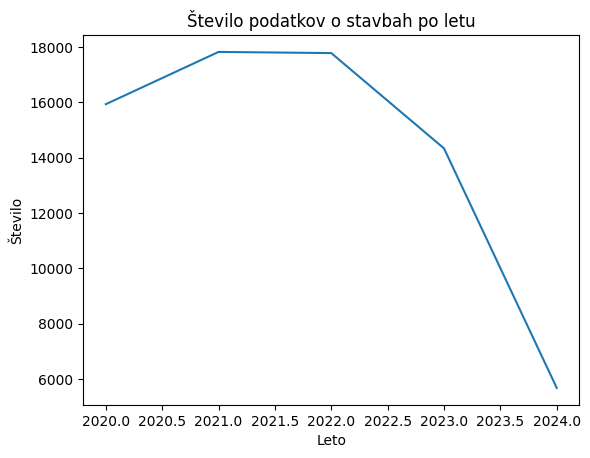

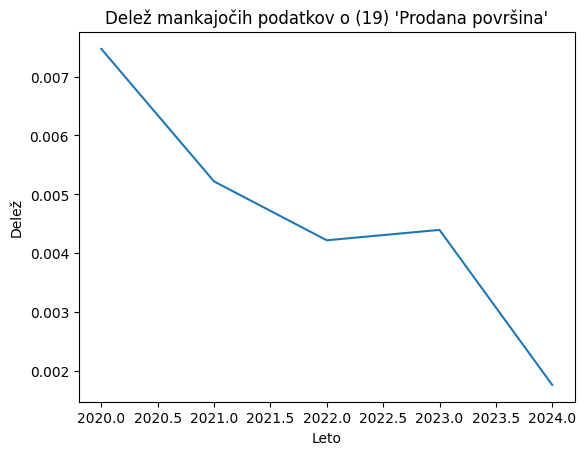

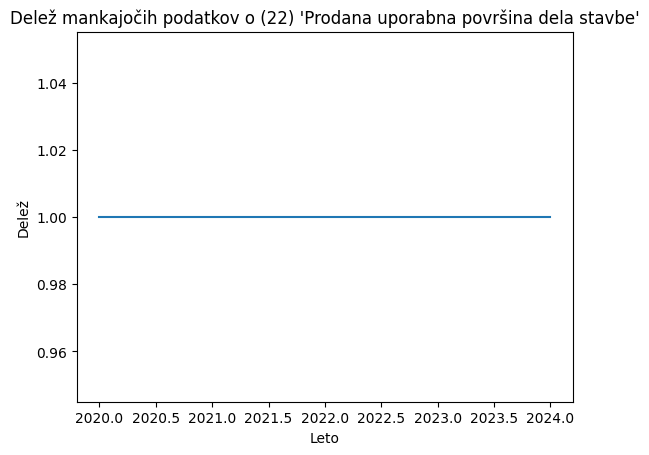

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(range(startYear,endYear + 1),allDataLenVsi)
plt.xlabel("Leto")
plt.ylabel("Število")
plt.title("Število podatkov o stavbah po letu")
plt.show()

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(range(startYear,endYear + 1),manka19Vsi)
plt.xlabel("Leto")
plt.ylabel("Delež")
plt.title("Delež mankajočih podatkov o (19) 'Prodana površina'")
plt.show()

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(range(startYear,endYear + 1),manka22Vsi)
plt.xlabel("Leto")
plt.ylabel("Delež")
plt.title("Delež mankajočih podatkov o (22) 'Prodana uporabna površina dela stavbe'")
plt.show()

S pomočjo zgornjih grafov smo se odločili, da uporabimo stolpec (19) 'Prodana površina', saj ima najmanj manjkajočih vrednosti. (Imeli smo več površin v podatkih)

In [ ]:
razlicneRegi = {}
for i in range(startYear,endYear + 1):
    razlicneRegi[i] = (0, 0)
    dictPosli = getDictPosli(posliEtnData[i])
    dictStavbe = getDictStavbe(deliEtnData[i])
    for id in dictPosli.keys():
        if id in dictStavbe:
            razl = not isteRegije(dictStavbe[id][1]) 
            razlicneRegi[i] = (razlicneRegi[i][0] + razl ,razlicneRegi[i][1] + 1) # stevilo poslov z stavbami v razlicnih regijah, vsota

In [ ]:
print("Kolikokrat se je kot del enega posla kupilo nepremičnine (stanovanje, stanovalsko hišo) iz več regij:")
for leto,data in razlicneRegi.items():
    print(f"{leto}: {str(data[0]).rjust(2)} / {str(data[1]).rjust(5)}  {'{0:.2f}'.format(round(data[0]/data[1]*100,2))}%")

Kolikokrat se je kot del enega posla kupilo nepremičnine (stanovanje, stanovalsko hišo) iz več regij:
2020: 32 / 14860  0.22%
2021: 35 / 16379  0.21%
2022: 41 / 16507  0.25%
2023:  9 / 13221  0.07%
2024:  0 /  5337  0.00%


Iz zgornje analize vidimo, da se redko kupijo kot del enega posla stanovanja iz različnih regij.

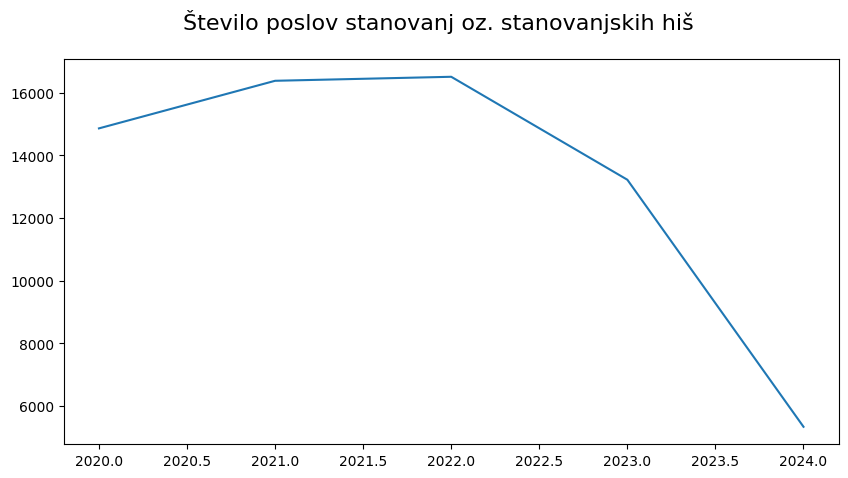

In [ ]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Število poslov stanovanj oz. stanovanjskih hiš' , fontsize=16)
fig.patch.set_facecolor('white')
data_poslov = {leto: data[1] for leto,data in razlicneRegi.items()}
plt.plot(data_poslov.keys(),data_poslov.values())
plt.show()

In [ ]:
vsiNameni = np.empty(1)
for i in range(startYear,endYear + 1):
    etnStavbe = deliEtnData[i]
    mask = np.logical_or(etnStavbe[:,14] == '1' , etnStavbe[:,14] == '2')
    etnStavbe = etnStavbe[mask,:]
    vsiNameni = np.concatenate((vsiNameni,np.unique(etnStavbe[:,28])),0)


In [ ]:
bivalskiNameni = [namen for namen in np.unique(vsiNameni)  if ("stano" in namen.lower() and "nestano" not in namen.lower()) or "koča" in namen.lower()]
# print(vsiNameni)
# print(bivalskiNameni)

In [ ]:
delezBivalisc = {}
for i in range(startYear, endYear + 1):
    etnStavbe = deliEtnData[i]
    mask = np.logical_or(etnStavbe[:,14] == '1' , etnStavbe[:,14] == '2') #zanimajo nas le stanovanja/stanovanjske hiše
    etnStavbe = etnStavbe[mask,:]
    vsaStanov = etnStavbe.shape[0]
    
    mask = etnStavbe[:,28] == bivalskiNameni[0]
    for nameni in bivalskiNameni[1:]:
        mask = np.logical_or(mask, etnStavbe[:,28] == nameni)

    delezBivalisc[i] = (etnStavbe[mask,:].shape[0],vsaStanov)

In [ ]:
print("Delež stanovanj z namenom bivališča")
print("-----------------------------------")
for leto, podatek in delezBivalisc.items():
    stanovanja,celota = podatek
    
    print(f"{leto}: {str(stanovanja).ljust(6)}/{str(celota).rjust(6)} | {'{0:.2f}'.format(round(stanovanja/celota*100,2))}%")

Delež stanovanj z namenom bivališča
-----------------------------------
2020: 15459 / 15928 | 97.06%
2021: 17362 / 17817 | 97.45%
2022: 17308 / 17775 | 97.37%
2023: 13994 / 14331 | 97.65%
2024: 5592  /  5676 | 98.52%


Vidimo, da je pred letom 2011 velik delež stanovanj in stanovanjskih hiš bilo uporabljenih za druge namene kot bivanje. Po letu 2011 pa delež v splošnem narašča.

In [ ]:
opombe = {}
regijskiMeter = getRegijskiCenaNaMeter()

In [ ]:
def grafRegijePoCeni(regija):
    cene = []
    stevila = []
    leta= []
    for key in regijskiMeter.keys():
        cena, stevilo = regijskiMeter[key][regija]
        cene.append(cena)
        stevila.append(stevilo)
        leta.append(key)

    plt.plot(leta,cene, label=regija, color=style[regija][0], linestyle=style[regija][1])

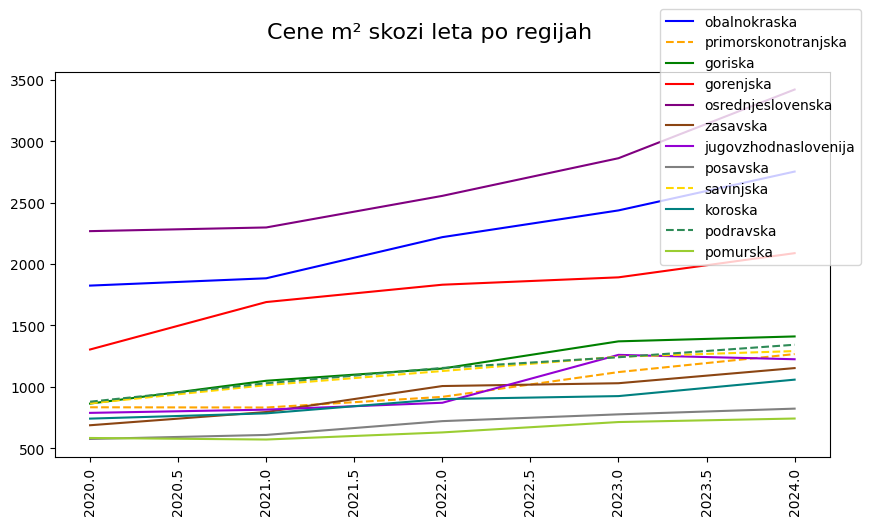

In [ ]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Cene m² skozi leta po regijah' , fontsize=16)
fig.patch.set_facecolor('white')
for key in regije.keys():
    grafRegijePoCeni(key)

plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="lower right", borderaxespad=0)
plt.show()


In [ ]:
povrsineRegija = {}
for i in range(startYear, endYear + 1):
    povrsineRegija[i] = {reg : [] for reg in regije.keys()}
    povrsineRegija[i]["Brez"] = []
    dictPosli = getDictPosli(posliEtnData[i])
    dictStavbe = getDictStavbe(deliEtnData[i])
    for id in dictPosli.keys():
        if id in dictStavbe:
            povrsineRegija[i][ whichRegija( dictStavbe[id][1][0] ) ].append( dictStavbe[id][0] / len(dictStavbe[id][1]) )

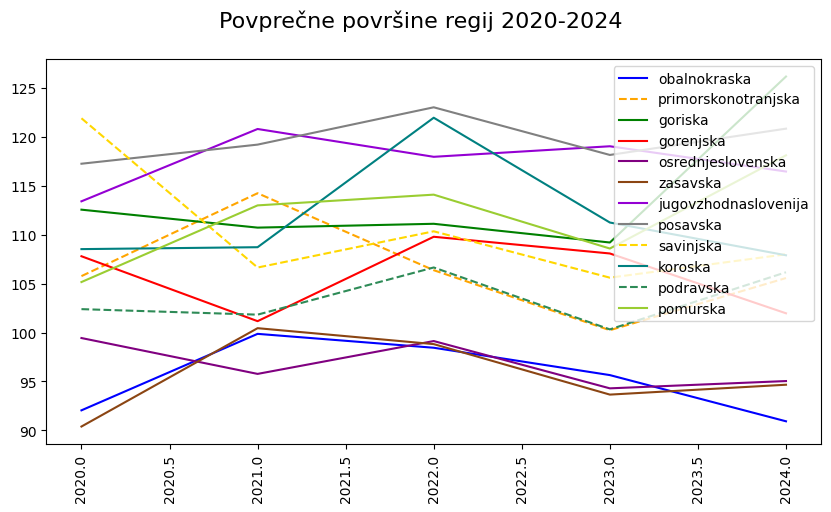

In [ ]:
#Povprecne povrsine po regijah
avgPovrsinaPoRegijah = { reg : [] for reg in regije.keys() }
avgPovrsinaPoRegijah["Brez"] = []

stPoslovPoRegijah = { reg : [] for reg in regije.keys() }
stPoslovPoRegijah["Brez"] = []

for leto in povrsineRegija.keys():
    for reg in povrsineRegija[leto].keys():
        stPoslovPoRegijah[reg].append( len(povrsineRegija[leto][reg]) )
        if len(povrsineRegija[leto][reg]) == 0:
            avgPovrsinaPoRegijah[reg].append(0)
        else:
            avgPovrsinaPoRegijah[reg].append( sum( povrsineRegija[leto][reg] ) / len( povrsineRegija[leto][reg] ) )
        #print(f"{reg.ljust(20)} {round(avgPovrsinaPoRegijah[leto][reg],4)}")
fig = plt.figure(figsize=(10,5))
fig.suptitle(f'Povprečne površine regij {startYear}-{endYear}' , fontsize=16)
fig.patch.set_facecolor('white')
for key, value in avgPovrsinaPoRegijah.items():
    if key != "Brez":
        plt.plot(range(startYear, endYear + 1),value, label=key, color=style[key][0], linestyle=style[key][1])
#plt.ylim(-10,300)
plt.legend()
plt.xticks(rotation=90)
plt.show()

Iz zgornjega grafa je razvidno, da je povprečna površina stanovanja okoli 100m<sup>2</sup>

In [ ]:
#izražanje cen v povprečnih neto plačah
def grafRegijePoMinPlacah(regija):
    cene = []
    #stevila = []
    leta= []
    for leto in regijskiMeter.keys():
        if(2010 <= leto <= 2021):
            cena, stevilo = regijskiMeter[leto][regija]
            cene.append(cena/float(leto_min_placa[str(leto)])*100)
            #stevila.append(stevilo)
            leta.append(leto)
    plt.plot([2014,2014],[0,600],color="black")
    plt.plot(leta,cene, label=regija, color=style[regija][0], linestyle=style[regija][1])
    
    return (leta,cene)
    
def grafRegijePoPovpNetoPlacah(regija):
    cene = []
    #stevila = []
    leta= []
    for leto in regijskiMeter.keys():
        if(2014 <= leto <= 2021):
            cena, stevilo = regijskiMeter[leto][regija]
            cene.append(cena/float(neto1[leto-2014])*100)
            #stevila.append(stevilo)
            leta.append(leto)
    
    plt.plot(leta,cene, label=regija, color=style[regija][0], linestyle=style[regija][1])
    
    return (leta,cene)


In [ ]:
def tabelaCen(seznam):
    leta = " |   ".join([str(l) for l in range(startYear,endYear + 1 )])
    print(f"{'Regija'.ljust(20)} |   {leta}")
    print("-"*128)
    for reg in seznam.keys():
        stPlac = " | ".join([('{0:.2f}'.format(round(st,2))).rjust(6) for st in seznam[reg]])
        print(f"{reg.ljust(20)} | {stPlac}")
# pričakuje regijskiMeter
def regTabelaCen(seznam):
    leta = " |".join([str(l).rjust(11) for l in range(startYear,endYear + 1 )])
    # za vsako regijo gremo čez vsa leta in naredimo list
    seznamPoRegijah = {reg:[seznam[l][reg][0] for l in range(startYear,endYear + 1 )] for reg in regije }
    print(f"{'Regija'.ljust(20)} |{leta}")
    print("-"*128)
    for reg, seznamPoLetihZaRegijo in seznamPoRegijah.items():
        stPlac = " | ".join([('{0:.2f}'.format(round(st,2))).rjust(10) for st in seznamPoLetihZaRegijo])
        print(f"{reg.ljust(20)} | {stPlac}")

In [ ]:
regTabelaCen(regijskiMeter)

Regija               |       2020 |       2021 |       2022 |       2023 |       2024
--------------------------------------------------------------------------------------------------------------------------------
obalnokraska         |    1823.70 |    1883.30 |    2218.59 |    2436.46 |    2752.98
primorskonotranjska  |     832.11 |     830.22 |     917.07 |    1118.94 |    1265.65
goriska              |     862.18 |    1048.15 |    1147.76 |    1369.37 |    1409.38
gorenjska            |    1303.00 |    1689.59 |    1830.91 |    1891.02 |    2088.03
osrednjeslovenska    |    2267.49 |    2297.51 |    2555.03 |    2861.78 |    3421.55
zasavska             |     685.64 |     793.32 |    1005.13 |    1028.14 |    1151.45
jugovzhodnaslovenija |     786.46 |     812.81 |     868.85 |    1259.30 |    1223.51
posavska             |     573.89 |     606.79 |     719.22 |     774.53 |     821.02
savinjska            |     863.85 |    1012.59 |    1127.60 |    1244.24 |    1290.09
koroska    

In [ ]:
def getRegijskiCenaNaMeterFiltr80_120():
    # regijska cena na meter za stavbe med 80-120m2
    cenaNaMeter = {}
    for i in range(startYear,endYear + 1):
        dictPosli = getDictPosli(posliEtnData[i])
        dtd = deliEtnData[i]
        filtr = np.logical_and(dtd[:, deliHeader['PRODANA_POVRSINA']] < 80, dtd[:, deliHeader['PRODANA_POVRSINA']] > 120)

        dictStavbe = getDictStavbe()
        #mask = np.logical_or(etnStavbe[:,14] == '1' , etnStavbe[:,14] == '2') #zanimajo nas le stanovanja/stanovanjske hiše
        
        
        cenaNaMeter[i] = generateCenaNaMeterPoRegiji(dictStavbe,dictPosli)
        #print(f"Leto {i} cena na meter: {naMeter}")
    return cenaNaMeter
regTabelaCen(getRegijskiCenaNaMeterFiltr80_120())

UFuncTypeError: ufunc 'less' did not contain a loop with signature matching types (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.Int64DType'>) -> <class 'numpy.dtypes.BoolDType'>

Pri primerjavi zgornjih dveh grafov moramo biti pozorni saj so razponi let drugači kot tudi razponi plač.

Iz prvega grafa lahko razberemo, da so bile posledice krize leta 2008, kar ekstremne za nepremičninski trg, saj so na začetku grafa zelo visoke vrednosti. Skozi leta, ko se je stanje umirilo so cene padale, vendar pa lahko vidimo, da v zadnjih letih spet naraščajo, kar je bolj razvidno na spodnjem grafu, saj prikazuje samo stanja od 2014 naprej in nam omogoča boljši pregled, saj ni vpliva višjih vrednosti nad grafom. Vidimo, da so vrednosti v obalnokraški, osrednjeslovenski ter gorenjski regiji skozi leta zelo narastle. Ostale regije so bolj statične, vendar prav tako sledijo trendu navzgor.

Za nabavo stanovanja v osredjnesloveniji bi potrebovali skoraj 20 let celotno plačo varčevati.

# Zaključek

Glede na podatke, ki smo jih obdelali je razvidna rast cen na nepremičninskem trgu, ter tudi rast števila transakcij. Rast je počasnejša brez ekstremnih sprememb, kot leta 2008. Glede na povprečno površino govorimo o kar velikih cenah za nekoga, ki dela za minimalne dohodke. Ne kaže pa dosti bolje tudi tistim, ki imajo prihodke malo večje. To nam poda odgovor na naše vprašanje, ali bo sodelovanje na trgu zmeraj težje. Odgovor je "DA". Rast se pojavu tudi pri številu transakcij in povprečni površini nepremičnin transakcij. Torej lahko izpeljemo, da se nepremičninski trg veča, torej se trguje z večjim številom nepremičnin, ki imajo vedno večjo površino, in so zmeroma bolj dražje.

Dodatne funkcije

In [ ]:
def sizeof_fmt(num, suffix="B"): #funkcija za formatiranje izpisa velikosti spremenljivk
    for unit in ["", "Ki", "Mi", "Gi", "Ti", "Pi", "Ei", "Zi"]:
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Yi{suffix}"

#preveri katerih podatkov ne more prebrati 
def checkRAM(ime):
    for i in range(startYear,endYear):
        try:
            data = EtnRead(i,ime)
            size = sizeof_fmt(sys.getsizeof(data))
            print(f"{i} => {data.dtype}, ram usage: {size}") #preveri tip tabele ie string length
            del data
        except Exception as e:
            print(f"{i} => {e}")  #prikazi katero leto ti vrže (memoryError -> zmankal rama) exception 
            pass

def test():
    print('delistavb')
    checkRAM('delistavb')
    print()

    print('zemljisca')
    checkRAM('zemljisca')
    print()

    print('posli')
    checkRAM('posli')
    
test()

delistavb
2020 => <U79, ram usage: 360.7MiB
2021 => <U78, ram usage: 391.8MiB
2022 => <U70, ram usage: 347.9MiB
2023 => <U71, ram usage: 290.7MiB

zemljisca
2020 => <U34, ram usage: 123.1MiB
2021 => <U34, ram usage: 143.1MiB
2022 => <U34, ram usage: 148.9MiB
2023 => <U29, ram usage: 109.9MiB

posli
2020 => <U10, ram usage: 20.3MiB
2021 => <U11, ram usage: 24.9MiB
2022 => <U10, ram usage: 22.8MiB
2023 => <U10, ram usage: 19.1MiB


In [ ]:
test()

delistavb
2020 => <U79, ram usage: 360.7MiB
2021 => <U78, ram usage: 391.8MiB
2022 => <U70, ram usage: 347.9MiB
2023 => <U71, ram usage: 290.7MiB

zemljisca
2020 => <U34, ram usage: 123.1MiB
2021 => <U34, ram usage: 143.1MiB
2022 => <U34, ram usage: 148.9MiB
2023 => <U29, ram usage: 109.9MiB

posli
2020 => <U10, ram usage: 20.3MiB
2021 => <U11, ram usage: 24.9MiB
2022 => <U10, ram usage: 22.8MiB
2023 => <U10, ram usage: 19.1MiB
